In [1]:
# Importing required libraries
import cv2
from google.colab.patches import cv2_imshow
import os
from os import listdir
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
path = r'/content/drive/MyDrive/Dataset/Class/'

In [4]:
# Setting the batch size and image parameters
batch_size = 32
img_height = 180
img_width = 180

In [5]:
# Creating training dataset which contains 80% of the total data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7192 files belonging to 3 classes.
Using 5754 files for training.


In [6]:
# Creating Validation dataset which contains the remanining 20% of the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7192 files belonging to 3 classes.
Using 1438 files for validation.


In [42]:
# Code for augmenting data with horizontal flipping and random zooming
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [50]:
# Setting up the CNN architecture along with data augmentation and Dropout by specifying the required parameters
from tensorflow.keras import layers
num_classes = 3

model = tf.keras.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, activation='relu',padding='same'),
  layers.MaxPooling2D(strides = 2),
  layers.Conv2D(32, 3, activation='relu', padding = 'same'),
  layers.MaxPooling2D(strides = 2),
  layers.Conv2D(64, 3, activation='relu', padding = 'same'),
  layers.MaxPooling2D(strides = 2),
  layers.Conv2D(90, 3, activation='relu', padding = 'same'),
  layers.MaxPooling2D(strides = 2),
  layers.Flatten(),
  layers.Dropout(0.4),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [51]:
# Setting up the loss function and optimizer
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [52]:
# Running the created CNN model
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds)

Epoch 1/30
180/180 [==============================] - 17s 87ms/step - loss: 1.0049 - accuracy: 0.4347 - val_loss: 1.0039 - val_accuracy: 0.4485
Epoch 2/30
180/180 [==============================] - 16s 88ms/step - loss: 0.9952 - accuracy: 0.4357 - val_loss: 0.9962 - val_accuracy: 0.4471
Epoch 3/30
180/180 [==============================] - 16s 87ms/step - loss: 0.9885 - accuracy: 0.4559 - val_loss: 0.9840 - val_accuracy: 0.4631
Epoch 4/30
180/180 [==============================] - 16s 87ms/step - loss: 0.9807 - accuracy: 0.4651 - val_loss: 0.9753 - val_accuracy: 0.4673
Epoch 5/30
180/180 [==============================] - 16s 85ms/step - loss: 0.9700 - accuracy: 0.4729 - val_loss: 0.9644 - val_accuracy: 0.4687
Epoch 6/30
180/180 [==============================] - 16s 88ms/step - loss: 0.9609 - accuracy: 0.4838 - val_loss: 0.9690 - val_accuracy: 0.4256
Epoch 7/30
180/180 [==============================] - 16s 86ms/step - loss: 0.9530 - accuracy: 0.4925 - val_loss: 0.9617 - val_accuracy:

In [73]:
class_names = train_ds.class_names

Judging by its cover this book is likely to be an Average read, with a 99.40% confidence.



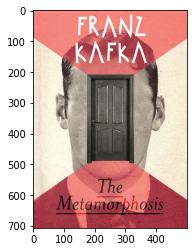

In [82]:
from tensorflow import keras
import matplotlib.image as mpimg

img = mpimg.imread('/content/sample_data/cover_3.jpeg')
imgplot = plt.imshow(img)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.image.resize(img_array,size=(180, 180))
img_array = tf.expand_dims(img_array, 0)
img_array = img_array/255.
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(f"Judging by its cover this book is likely to be an {class_names[np.argmax(score)]} read, with a {np.max(score)*100:.2f}% confidence.\n")